In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
plt.rc('figure', figsize=(10, 6))
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Miscellaneous Data

In [3]:
country_data = pd.read_csv("/Users/romilrathi/Documents/GitHub/ddf--gapminder--systema_globalis/ddf--entities--geo--country.csv")
continent_data = pd.read_csv("/Users/romilrathi/Documents/GitHub/ddf--gapminder--systema_globalis/ddf--entities--geo--world_4region.csv")

In [4]:
country_data.rename(columns={'country':'geo','name':'Country','world_4region':'continent'}, inplace=True)
country_mapping = country_data[['geo','Country', 'continent','latitude', 'longitude']]
country_mapping.sample(5)

continent_data.rename(columns={'world_4region':'continent', 'name_short':'Continent' }, inplace=True)
continent_data = continent_data[['continent', 'Continent']]

## Merging Continent and Country data
country_cont = pd.merge(country_mapping, continent_data, how='inner', on=['continent'])
country_cont = country_cont[['geo', 'Country', 'Continent', 'latitude', 'longitude']]
country_cont.sample(5)

,geo,Country,Continent,latitude,longitude
35,hos,Holy See,Europe,41.90236,12.45332
65,svk,Slovak Republic,Europe,48.66667,19.50000
146,hkg,"Hong Kong, China",Asia,22.28552,114.15769
126,vct,St. Vincent and the Grenadines,America,13.08333,-61.20000
181,phl,Philippines,Asia,13.00000,122.00000


## Solution 4

### GDP Data Wrangling

In [5]:
gdp_per_capita_data = pd.read_csv("/Users/romilrathi/Documents/GitHub/ddf--gapminder--systema_globalis/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
gdp_per_capita_data.rename(columns={"gdppercapita_us_inflation_adjusted": "gdp_per_capita"}, inplace=True)
gdp_per_capita_data.sample(5)

,geo,time,gdp_per_capita
2732,fin,2005,45353.26000
708,bgd,1966,398.70816
7957,tkm,2010,4439.20300
2255,dma,2014,6951.03240
5112,mac,2011,62279.51728


In [6]:
#Merging gdp data with country and continent information
gdp_country_continent = pd.merge(gdp_per_capita_data, country_cont, how='inner', on='geo')

#identifying % change in gdp per capita for each country and dropping the null values
data = []
for country in list(set(gdp_country_continent['Country'])):
    temp = gdp_country_continent.loc[gdp_country_continent.Country == country]
    temp['pct_gdp_change'] = temp['gdp_per_capita'].pct_change()
    data.append(temp)
    
df = pd.concat(data)
df.dropna(inplace=True)
df.sample(5)

,geo,time,gdp_per_capita,Country,Continent,latitude,longitude,pct_gdp_change
478,bdi,1968,231.17092,Burundi,Africa,-3.50000,30.00000,-0.027695
765,bgr,1985,3758.34003,Bulgaria,Europe,42.66667,25.25000,0.026850
4721,lbn,1994,6416.32652,Lebanon,Asia,33.83333,35.83333,0.053241
4457,kgz,2007,819.80630,Kyrgyz Republic,Asia,41.50000,75.00000,0.075127
3800,idn,1973,883.47899,Indonesia,Asia,-5.00000,120.00000,0.053346


### Life Expectancy Data Wrangling

In [7]:
life_expectancy = pd.read_csv('/Users/romilrathi/Documents/GitHub/ddf--gapminder--systema_globalis/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
life_expectancy = pd.merge(life_expectancy, country_cont, how='inner', on='geo')
life_expectancy = life_expectancy[['time', 'Country', 'Continent','life_expectancy_years','latitude', 'longitude']]

In [8]:
#identifying % change in gdp per capita for each country and dropping the null values
data = []
for country in list(set(life_expectancy['Country'])):
    temp = life_expectancy.loc[life_expectancy.Country == country]
    temp['pct_life_expectancy'] = temp['life_expectancy_years'].pct_change()
    data.append(temp)
    
life_expectancy = pd.concat(data)
life_expectancy.dropna(inplace=True)

In [9]:
life_expectancy.sample(5)

,time,Country,Continent,life_expectancy_years,latitude,longitude,pct_life_expectancy
12112,1822,Spain,Europe,29.50,40.00000,-4.00,0.000000
29876,1978,Netherlands,Europe,75.30,52.25000,5.75,0.001863
37373,1810,Slovenia,Europe,36.60,46.08333,15.00,0.000000
1248,1899,United Arab Emirates,Asia,31.22,23.75000,54.50,0.000320
42259,1879,St. Vincent and the Grenadines,America,25.98,13.08333,-61.20,0.000000


### Merging Life Expectancy and GDP Data

In [10]:
life_gdp = pd.merge(life_expectancy, df, how='inner', on=['time','Country', 'latitude', 'longitude', 'Continent'])

In [11]:
life_gdp.describe()

,time,life_expectancy_years,latitude,longitude,pct_life_expectancy,gdp_per_capita,pct_gdp_change
count,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000
mean,1992.854039,66.381919,17.194300,15.529107,0.005060,10676.931278,0.020850
std,15.668369,9.910531,24.027594,67.766328,0.037535,15899.086146,0.063424
min,1961.000000,12.640000,-42.000000,-175.000000,-0.732430,115.794140,-0.649963
25%,1981.000000,59.220000,1.700000,-15.000000,0.001737,1130.051472,-0.001928
50%,1995.000000,68.845000,15.500000,17.000000,0.003730,3472.038365,0.021901
75%,2006.000000,74.100000,35.685360,47.000000,0.007251,13333.870545,0.045672
max,2017.000000,84.030000,72.000000,178.000000,2.529272,113682.038240,1.405011


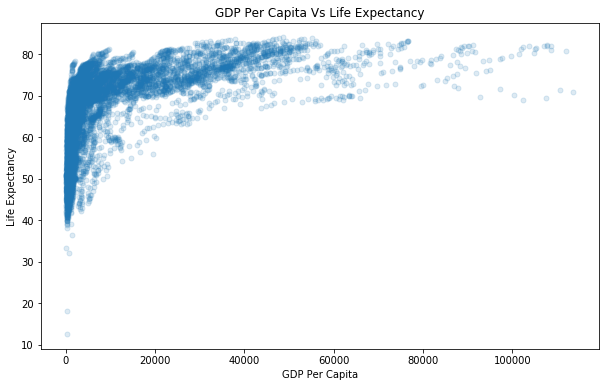

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(((life_gdp['gdp_per_capita'])), ((life_gdp['life_expectancy_years'])), linestyle='', marker='o', markersize=5, alpha=0.15)
plt.title("GDP Per Capita Vs Life Expectancy")
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy")
plt.savefig("Fig1.png")
plt.show()

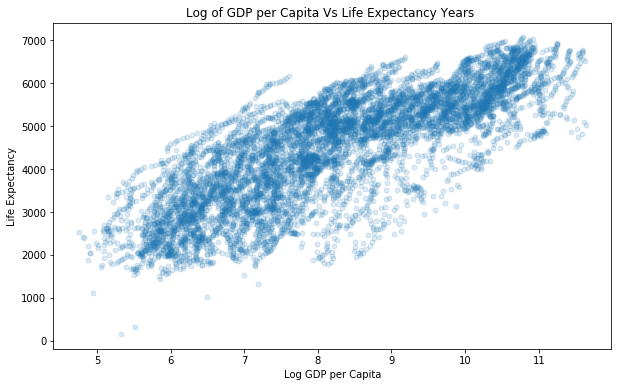

In [13]:
plt.figure(figsize=(10, 6))
plt.xlabel("Log GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Log of GDP per Capita Vs Life Expectancy Years ")
plt.plot(np.log((life_gdp['gdp_per_capita'])), (np.square(life_gdp['life_expectancy_years'])), linestyle='', marker='o', markersize=5, alpha=0.15)
plt.savefig("Fig2.png")
plt.show()

In [14]:
life_gdp['log_gdp'] = np.log(life_gdp['gdp_per_capita'])

In [16]:
regressor_model = smf.ols(formula='life_expectancy_years ~  log_gdp', data=life_gdp).fit()
regressor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.616
Model:                               OLS   Adj. R-squared:                  0.616
Method:                    Least Squares   F-statistic:                 1.363e+04
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                           02:34:57   Log-Likelihood:                -27545.
No. Observations:                   8516   AIC:                         5.509e+04
Df Residuals:                       8514   BIC:                         5.511e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4173      0.366     66.801      0.000      23.701      25.134
log_gdp        5.0946      0.044    116.760      0.000       5.009       5.180
==============================================================================
Omnibus:                      503.684   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.982
Skew:                          -0.582   Prob(JB):                    7.12e-137
Kurtosis:                       3.641   Cond. No.                         46.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

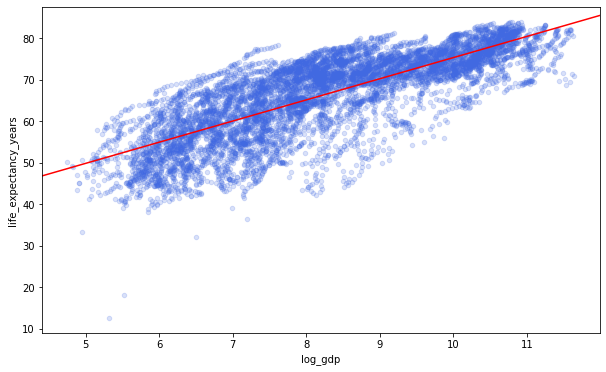

In [30]:
plt.rc('figure', figsize=(10, 6))
ax = life_gdp.plot(x='log_gdp', y='life_expectancy_years', kind='scatter', color='royalblue', alpha=0.2, marker='o')
abline_plot(model_results=regressor_model, ax=ax, color='r')
plt.savefig("Reg1.png")
plt.show()

In [33]:
regressor_model = smf.ols(formula='life_expectancy_years ~  log_gdp + time', data=life_gdp).fit()
regressor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.701
Model:                               OLS   Adj. R-squared:                  0.701
Method:                    Least Squares   F-statistic:                     9988.
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                           02:38:37   Log-Likelihood:                -26472.
No. Observations:                   8516   AIC:                         5.295e+04
Df Residuals:                       8513   BIC:                         5.297e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -346.9314      7.527    -46.094      0.000    -361.685    -332.178
log_gdp        4.7754      0.039    122.413      0.000       4.699       4.852
time           0.1877      0.004     49.384      0.000       0.180       0.195
==============================================================================
Omnibus:                      946.332   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1723.203
Skew:                          -0.745   Prob(JB):                         0.00
Kurtosis:                       4.623   Cond. No.                     2.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
### Mean GDP

In [34]:
mean_life_gdp = life_gdp.groupby(['time']).mean().reset_index()

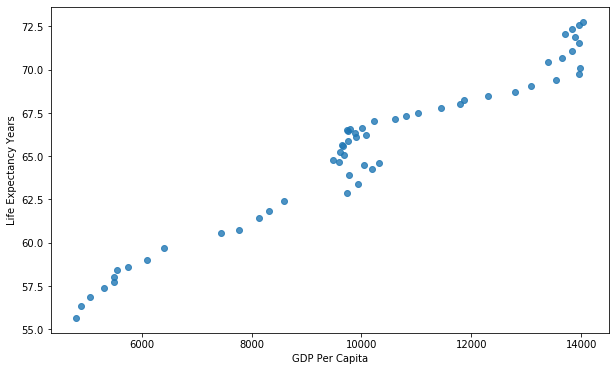

In [43]:
plt.scatter((mean_life_gdp['gdp_per_capita']), (mean_life_gdp['life_expectancy_years']), alpha=0.8)
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy Years")
plt.savefig("Mean_Life_GDP.png")
plt.show()

In [38]:
regressor_model = smf.ols(formula='life_expectancy_years ~ gdp_per_capita', data=mean_life_gdp).fit()
regressor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.956
Model:                               OLS   Adj. R-squared:                  0.955
Method:                    Least Squares   F-statistic:                     1186.
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):           6.61e-39
Time:                           02:39:20   Log-Likelihood:                -78.696
No. Observations:                     57   AIC:                             161.4
Df Residuals:                         55   BIC:                             165.5
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         49.0680      0.490    100.192      0.000      48.086      50.049
gdp_per_capita     0.0016   4.69e-05     34.439      0.000       0.002       0.002
==============================================================================
Omnibus:                        3.970   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                2.014
Skew:                          -0.149   Prob(JB):                        0.365
Kurtosis:                       2.129   Cond. No.                     3.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
mean_life_gdp['log_gdp'] = np.log(mean_life_gdp['gdp_per_capita'])

In [41]:
regressor_model_mean = smf.ols(formula='life_expectancy_years ~ log_gdp', data=mean_life_gdp).fit()
regressor_model_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.947
Model:                               OLS   Adj. R-squared:                  0.946
Method:                    Least Squares   F-statistic:                     983.9
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):           8.81e-37
Time:                           02:39:35   Log-Likelihood:                -83.763
No. Observations:                     57   AIC:                             171.5
Df Residuals:                         55   BIC:                             175.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.8268      4.216    -15.852      0.000     -75.275     -58.379
log_gdp       14.4079      0.459     31.368      0.000      13.487      15.328
==============================================================================
Omnibus:                        2.269   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.155
Skew:                          -0.457   Prob(JB):                        0.340
Kurtosis:                       2.729   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

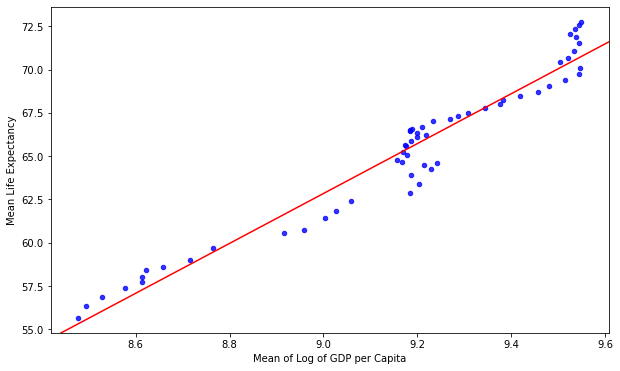

In [45]:
ax = mean_life_gdp.plot(x='log_gdp', y='life_expectancy_years', kind='scatter', color='b', alpha=0.8, marker='o')
abline_plot(model_results=regressor_model_mean, ax=ax, color='r')
plt.xlabel("Mean of Log of GDP per Capita")
plt.ylabel("Mean Life Expectancy")
plt.savefig("Reg2.png")
plt.show()

## Solution 5

In [46]:
child_mortality = pd.read_csv('/Users/romilrathi/Documents/GitHub/ddf--gapminder--systema_globalis/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')

In [47]:
child_mortality = pd.merge(child_mortality, country_cont, on=['geo'], how='inner')

In [48]:
child_mortality.rename(columns={'child_mortality_0_5_year_olds_dying_per_1000_born':'child_mortality_rate'}, inplace=True)

In [49]:
gdp_mortality = pd.merge(child_mortality[['time','Country', 'Continent', 'child_mortality_rate']], df, how='inner', on=['time','Country','Continent'])

In [50]:
gdp_mortality.describe()

,time,child_mortality_rate,gdp_per_capita,latitude,longitude,pct_gdp_change
count,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000
mean,1992.965635,73.585592,10331.714751,16.796005,16.845139,0.021092
std,15.673404,76.517349,15482.851938,23.750463,68.031888,0.063688
min,1961.000000,2.075000,115.794140,-42.000000,-175.000000,-0.649963
25%,1981.000000,15.500000,1127.443030,1.421000,-14.250000,-0.001881
50%,1995.000000,41.600000,3405.781860,15.500000,17.833330,0.022036
75%,2006.000000,110.100000,12481.189610,35.685360,47.500000,0.046010
max,2017.000000,408.400000,113682.038240,65.000000,179.144780,1.405011


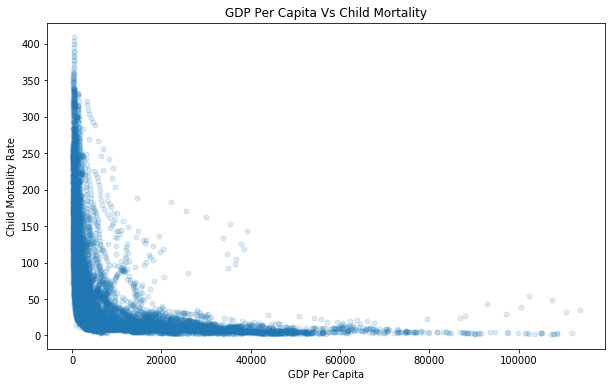

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(((gdp_mortality['gdp_per_capita'])), ((gdp_mortality['child_mortality_rate'])), linestyle='', marker='o', markersize=5, alpha=0.15)
plt.title("GDP Per Capita Vs Child Mortality")
plt.xlabel("GDP Per Capita")
plt.ylabel("Child Mortality Rate")
plt.savefig("C1.png")
plt.show()

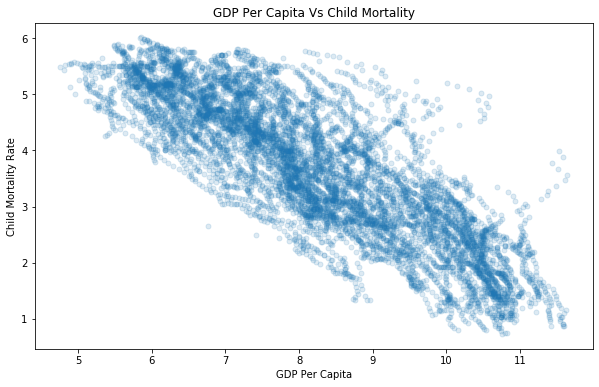

In [55]:
plt.figure(figsize=(10, 6))
plt.plot((np.log(gdp_mortality['gdp_per_capita'])), (np.log(gdp_mortality['child_mortality_rate'])), linestyle='', marker='o', markersize=5, alpha=0.15)
plt.title("GDP Per Capita Vs Child Mortality")
plt.xlabel("GDP Per Capita")
plt.ylabel("Child Mortality Rate")
plt.savefig("C2.png")
plt.show()

In [52]:
gdp_mortality['log_gdp'] = np.log(gdp_mortality['gdp_per_capita'])
gdp_mortality['log_mortality'] = np.log(gdp_mortality['child_mortality_rate'])

In [53]:
gdp_mortality.corr()

,time,child_mortality_rate,gdp_per_capita,latitude,longitude,pct_gdp_change,log_gdp,log_mortality
time,1.000000,-0.476650,0.166219,0.077471,0.071082,-0.014763,0.174115,-0.475703
child_mortality_rate,-0.476650,1.000000,-0.460711,-0.308285,0.008348,-0.065471,-0.710910,0.871970
gdp_per_capita,0.166219,-0.460711,1.000000,0.423966,0.003416,-0.020581,0.806495,-0.687734
latitude,0.077471,-0.308285,0.423966,1.000000,-0.006363,0.051455,0.397368,-0.452438
longitude,0.071082,0.008348,0.003416,-0.006363,1.000000,0.045969,-0.096660,0.005405
pct_gdp_change,-0.014763,-0.065471,-0.020581,0.051455,0.045969,1.000000,0.038860,-0.041916
log_gdp,0.174115,-0.710910,0.806495,0.397368,-0.096660,0.038860,1.000000,-0.833867
log_mortality,-0.475703,0.871970,-0.687734,-0.452438,0.005405,-0.041916,-0.833867,1.000000


In [56]:
regressor_model = smf.ols(formula='log_mortality ~ log_gdp', data=gdp_mortality).fit()
regressor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_mortality   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 1.939e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:14:31   Log-Likelihood:                -8717.5
No. Observations:                8497   AIC:                         1.744e+04
Df Residuals:                    8495   BIC:                         1.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2185      0.041    227.605      0.000       9.139       9.298
log_gdp       -0.6750      0.005   -139.241      0.000      -0.685      -0.666
==============================================================================
Omnibus:                      197.249   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.971
Skew:                           0.336   Prob(JB):                     1.41e-49
Kurtosis:                       3.428   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

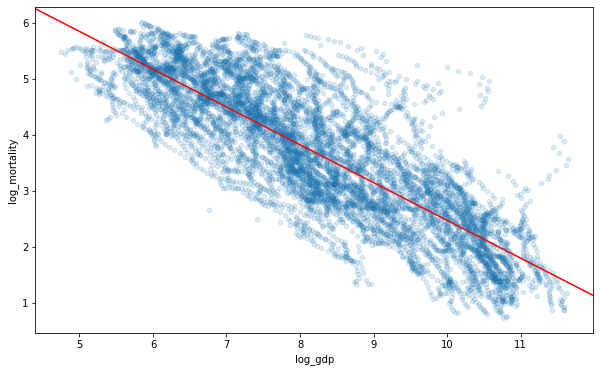

In [59]:
ax = gdp_mortality.plot(x='log_gdp', y='log_mortality', kind='scatter', alpha=0.15, marker='o')
abline_plot(model_results=regressor_model, ax=ax, color='r')
plt.savefig("model.png")
plt.show()

In [60]:
regressor_model_time = smf.ols(formula='log_mortality ~ time + log_gdp', data=gdp_mortality).fit()
regressor_model_time.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_mortality   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 1.787e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:16:14   Log-Likelihood:                -6756.2
No. Observations:                8497   AIC:                         1.352e+04
Df Residuals:                    8494   BIC:                         1.354e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.8316      0.746     82.886      0.000      60.369      63.294
time          -0.0266      0.000    -70.594      0.000      -0.027      -0.026
log_gdp       -0.6270      0.004   -160.414      0.000      -0.635      -0.619
==============================================================================
Omnibus:                      476.814   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.052
Skew:                           0.473   Prob(JB):                    6.02e-163
Kurtosis:                       4.102   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
gdp_mortality_mean = gdp_mortality.groupby('time').mean().reset_index()

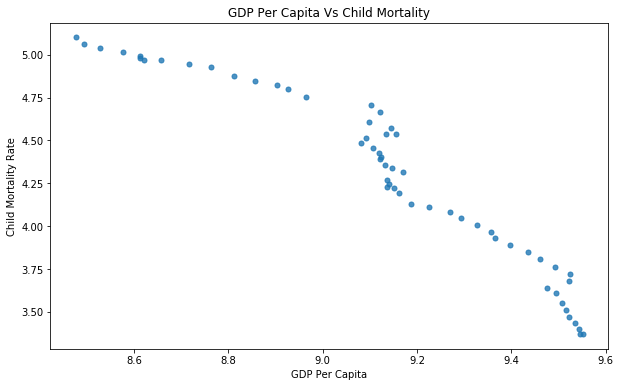

In [63]:
plt.figure(figsize=(10, 6))
plt.plot((np.log(gdp_mortality_mean['gdp_per_capita'])), (np.log(gdp_mortality_mean['child_mortality_rate'])), linestyle='', marker='o', markersize=5, alpha=0.8)
plt.title("GDP Per Capita Vs Child Mortality")
plt.xlabel("GDP Per Capita")
plt.ylabel("Child Mortality Rate")
plt.savefig("C3.png")
plt.show()

In [64]:
model_mean = smf.ols(formula='log_mortality ~ log_gdp', data=gdp_mortality_mean).fit()
model_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_mortality   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     624.1
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.07e-31
Time:                        04:16:31   Log-Likelihood:                 18.973
No. Observations:                  57   AIC:                            -33.95
Df Residuals:                      55   BIC:                            -29.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3567      0.662     30.732      0.000      19.029      21.684
log_gdp       -2.0284      0.081    -24.982      0.000      -2.191      -1.866
==============================================================================
Omnibus:                        3.536   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.349
Skew:                           0.583   Prob(JB):                        0.187
Kurtosis:                       2.775   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

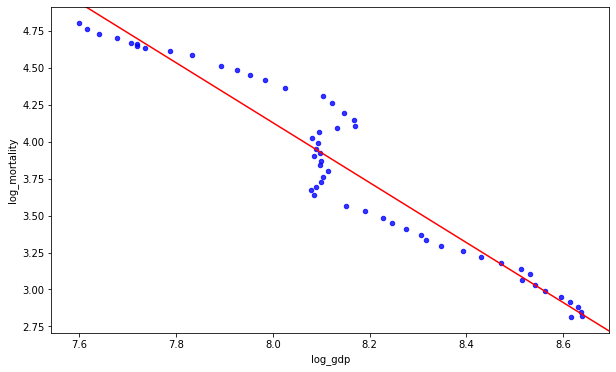

In [67]:
ax = gdp_mortality_mean.plot(x='log_gdp', y='log_mortality', kind='scatter', color='b', alpha=0.8, marker='o')
abline_plot(model_results=model_mean, ax=ax, color='r')
plt.savefig("last.png")
plt.show()